<a href="https://colab.research.google.com/github/PosgradoMNA/Actividades_Aprendizaje-A01794023-Andres_Palacios/blob/main/Actividad_Semanal_6%2C_visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Actividad Semanal - 4**
##**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
##**Tecnológico de Monterrey**
##**Fecha: 2 de noviembre del 2022**
##**Nombre del estudiante: Jaime Andres Palacios Campaña**
##**Matrícula: A01794023**

**Información del dataset**

Basados en el documento de información de el dataset, podemos observar que que la información encontrada apunta al caso de los pagos predeterminados de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento. Arrojando como resultado la precisión predictiva de la probabilidad de incumplimiento estimada en resultado binario de la clasificación: clientes creíbles o no creíbles.

**Información de los atributos:**

Esta investigación empleó una variable binaria, pago por defecto (Sí = 1, No = 0), como variable de respuesta. Este estudio utilizó las siguientes 23 variables como variables explicativas:

*   X1: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
*   X2: Género (1 = masculino; 2 = femenino).
*   X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
*   X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
*   X5: Edad (año).
*   X6 - X11: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera: X6 = el estado de pago en septiembre de 2005; X7 = el estado de pago en agosto de 2005; . . .;X11 = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
*   X12-X17: Importe del estado de cuenta (dólar NT). X12 = monto del estado de cuenta en septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = monto del estado de cuenta en abril de 2005.
*   X18-X23: Monto del pago anterior (dólar NT). X18 = monto pagado en septiembre de 2005; X19 = monto pagado en agosto de 2005; . . .;X23 = monto pagado en abril de 2005.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Iniciamos ingresando el dataset, eliminando la columna ID ya que no es relevante para lo propuesto de esta actividad. Seguido de un analisis de las variables.

In [2]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

path_df = pd.read_csv(path,
                      index_col=0 #este parametro nos permite eliminar lo datos de la columna ID ya que no es necesaria
                      )

path_df.index.name = None #Esto nos permite eliminar el titulo de la columna ID

#Copiamos el dataframe con los datos originales para tener su backup.
data_df = path_df.copy()

data_df.info()
data_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
22779,390000,2.0,1.0,2.0,33.0,0.0,0.0,0.0,0.0,0.0,...,82853.0,82747.0,44143.0,5000.0,3500.0,4502.0,3518.0,2003.0,3001.0,0.0
28158,130000,2.0,3.0,1.0,31.0,0.0,-1.0,-1.0,-1.0,-1.0,...,-1018.0,89445.0,90179.0,4065.0,6704.0,21018.0,92610.0,3272.0,3332.0,1.0
27926,360000,2.0,1.0,2.0,26.0,2.0,2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17067,100000,2.0,2.0,2.0,24.0,0.0,0.0,0.0,0.0,-1.0,...,17716.0,1002.0,1518.0,1439.0,2000.0,10070.0,1002.0,1000.0,500.0,0.0
1177,50000,2.0,2.0,2.0,35.0,0.0,0.0,0.0,0.0,0.0,...,17056.0,17581.0,18089.0,1700.0,1300.0,900.0,800.0,800.0,900.0,0.0
20994,200000,1.0,1.0,1.0,47.0,1.0,2.0,2.0,0.0,0.0,...,166515.0,163673.0,145683.0,8013.0,13.0,8684.0,5500.0,7437.0,4600.0,1.0
7747,170000,2.0,1.0,1.0,31.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20153,260000,2.0,2.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,...,163477.0,139993.0,133197.0,15521.0,10005.0,7000.0,5500.0,5000.0,4000.0,0.0
28045,190000,2.0,1.0,2.0,28.0,0.0,0.0,0.0,0.0,0.0,...,151905.0,153538.0,156664.0,5618.0,5795.0,7408.0,5645.0,5753.0,6370.0,0.0
25222,130000,2.0,3.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,...,57434.0,58593.0,60504.0,4600.0,4500.0,2802.0,2050.0,2800.0,2300.0,1.0


Nos llevamos todos los valores vacíos. De lo contrario, nos va a dar un error cuando apliquemos el PCA.

In [3]:
data_df.dropna(axis = 0, inplace=True)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29958 non-null  int64  
 1   X2      29958 non-null  float64
 2   X3      29958 non-null  float64
 3   X4      29958 non-null  float64
 4   X5      29958 non-null  float64
 5   X6      29958 non-null  float64
 6   X7      29958 non-null  float64
 7   X8      29958 non-null  float64
 8   X9      29958 non-null  float64
 9   X10     29958 non-null  float64
 10  X11     29958 non-null  float64
 11  X12     29958 non-null  float64
 12  X13     29958 non-null  float64
 13  X14     29958 non-null  float64
 14  X15     29958 non-null  float64
 15  X16     29958 non-null  float64
 16  X17     29958 non-null  float64
 17  X18     29958 non-null  float64
 18  X19     29958 non-null  float64
 19  X20     29958 non-null  float64
 20  X21     29958 non-null  float64
 21  X22     29958 non-null  float64
 22

Cambiamos el tipo de algunos datos por temas de consistencia.

In [4]:
data_df[:] = data_df[:].astype('float64')
data_df.dtypes

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

Revisamos los datos unicos de las variables categoricas

In [5]:
print('X2' + str(sorted(data_df['X2'].unique())))
print('X3' + str(sorted(data_df['X3'].unique())))
print('X4' + str(sorted(data_df['X4'].unique())))
print('X6' + str(sorted(data_df['X6'].unique())))
print('X7' + str(sorted(data_df['X7'].unique())))
print('X8' + str(sorted(data_df['X8'].unique())))
print('X9' + str(sorted(data_df['X9'].unique())))
print('X10' + str(sorted(data_df['X10'].unique())))
print('X11' + str(sorted(data_df['X11'].unique())))
print('Y' + str(sorted(data_df['Y'].unique())))

X2[1.0, 2.0]
X3[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
X4[0.0, 1.0, 2.0, 3.0]
X6[-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X7[-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X8[-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X9[-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X10[-2.0, -1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X11[-2.0, -1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
Y[0.0, 1.0]


Como podemos observar hay datos que no estan documentados para las categorias de las variables X3, X4 y X6-X11 segun el *'Data Set Information'* por lo que procedemos a corregirlos

In [6]:
#Modificamos los datos que están fuera de las categorias
data_df['X3'] = data_df['X3'].replace({0:4, 5:4, 6:4})
data_df['X4'] = data_df['X4'].replace({0:3})
data_df['X6'] = data_df['X6'].replace({0:1})
data_df['X7'] = data_df['X7'].replace({0:1})
data_df['X8'] = data_df['X8'].replace({0:1})
data_df['X9'] = data_df['X9'].replace({0:1})
data_df['X10'] = data_df['X10'].replace({0:1})
data_df['X11'] = data_df['X11'].replace({0:1})


In [7]:
#Validamos que la corrección se realizo correctamente
print('X3' + str(sorted(data_df['X3'].unique())))
print('X4' + str(sorted(data_df['X4'].unique())))
print('X6' + str(sorted(data_df['X6'].unique())))
print('X7' + str(sorted(data_df['X7'].unique())))
print('X8' + str(sorted(data_df['X8'].unique())))
print('X9' + str(sorted(data_df['X9'].unique())))
print('X10' + str(sorted(data_df['X10'].unique())))
print('X11' + str(sorted(data_df['X11'].unique())))

X3[1.0, 2.0, 3.0, 4.0]
X4[1.0, 2.0, 3.0]
X6[-2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X7[-2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X8[-2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X9[-2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X10[-2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X11[-2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


Analizamos descriptibamente la base de datos para poder hacer inferencias sobre la información.

In [8]:
data_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.842212,1.557147,35.483443,0.474130,0.390346,0.358702,0.327358,0.298151,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.744557,0.521388,9.214319,1.236975,1.350255,1.362022,1.362135,1.352548,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Con el analisis descriptivo podemos inferir los siguiente:

*   Hay 29,958 clientes distintos de tarjetas de crédito.
*   El valor promedio de la cantidad de monto del crédito otorgado es 167,555. La desviación estándar es inusualmente grande, siendo el valor máximo de 1 millon.
*   El nivel educativo es mayoritariamente de posgrado y universitario.
*   La mayoría de los clientes son casados ​​o solteros (menos frecuente el estado civil "otros").
*   La edad promedio es de 35,5 años, con una desviación estándar de 9,2.
*   Como el valor 0 para incumplimiento de pago significa 'no incumplimiento' y el valor 1 significa 'incumplimiento', la media de 0.221 significa que hay un 22.1% de contratos de tarjetas de crédito que incumplirán el próximo mes.




**Exploracion de datos**

In [9]:
#Sacamos la variable Y, para dejar unicamente las variables X
y_target = data_df['Y']
x_features = data_df.drop('Y', axis=1)

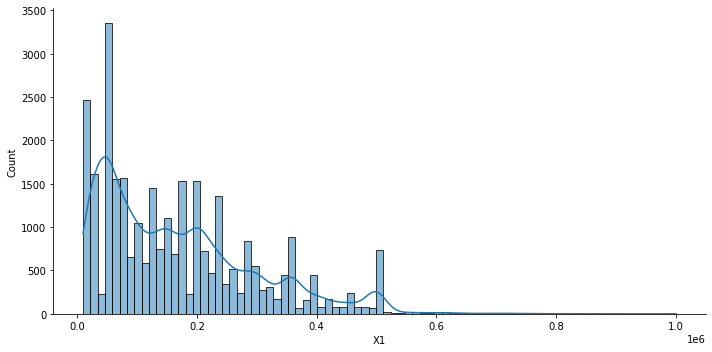

In [10]:
sns.displot(x_features['X1'], x=x_features['X1'], kde=True, height=5, aspect=2)
plt.show()

Aparentemente, el grupo más grande de cantidad del monto del crédito otorgado es por una cantidad de 50,000.

In [11]:
#Confirmamos si realmente es así
x_features['X1'].value_counts().head(5)

50000.0     3356
20000.0     1969
30000.0     1607
80000.0     1565
200000.0    1528
Name: X1, dtype: int64

Veamos la distribución del monto del crédito otorgado (X1) vs. sexo (X2). Para el sexo, 1 representa masculino y 2 femenino.

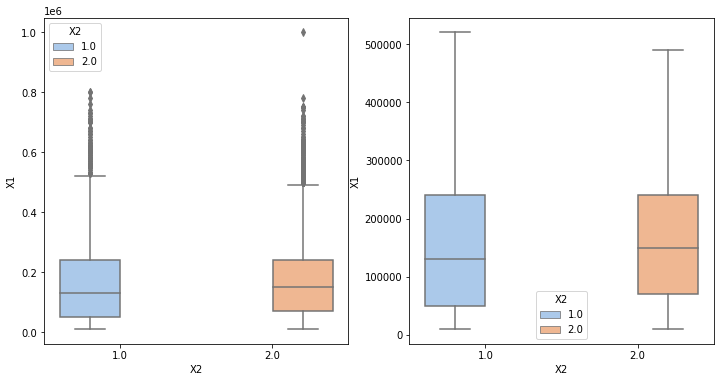

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="X2", y="X1", hue="X2",data=x_features, palette="pastel",showfliers=True)
s = sns.boxplot(ax = ax2, x="X2", y="X1", hue="X2",data=x_features, palette="pastel",showfliers=False)
plt.show();

La cantidad del monto del crédito otorgado está bastante equilibrada entre sexos. Los hombres tienen una mediana ligeramente más pequeña y un Q3 y Q4 más grandes. Las mujeres tienen un valor máximo de valores atípicos más grande (1 millón).

Ahora revisaremos las distribuciones por sexo (X2), educación (X3), edad (X5) y estado civil (X4). 

Comenzamos mostrando los diagramas de caja con la distribución por edad agrupada por estado civil (4) y sexo (X2).

Las variables del estado civil (X4) son:

*   1: casado, 2: soltero y 3: otros.

Las variables de genero (X2) son:
*   1: masculino y 2: femenino

In [13]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data_df, palette="pastel",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

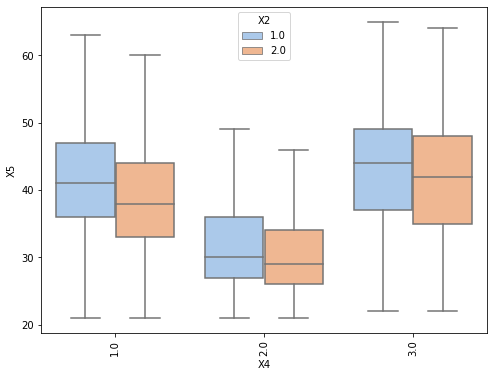

In [14]:
boxplot_variation('X4','X5','X2',8)

Parece que el estado de casado 3 (otros), con valores medios superiores a 40 y valores de Q4 superiores a 60 significa que en su mayoría son viudos o divorciados. Los hombres casados ​​tienen una edad media superior a las mujeres casadas. Los hombres solteros también tienen un valor medio para la edad por encima de las mujeres solteras, pero más cercano. Los valores de Q3 y Q4 para hombres casados ​​están por encima de los valores correspondientes para mujeres casadas.

Ahora analicemos mediante diagramas de caja la distribución por edad (X5)agrupados por educación (X3) y estado civil (x4).

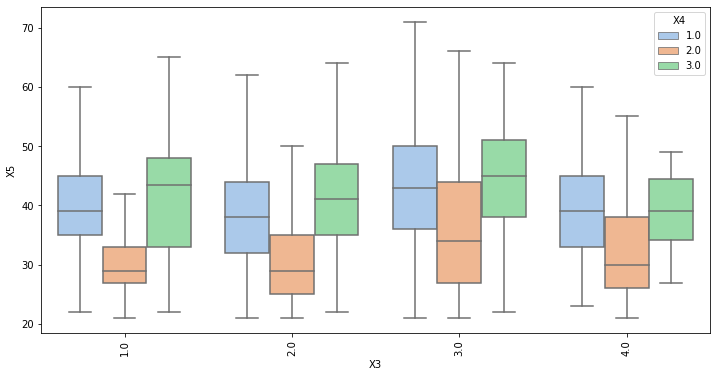

In [15]:
boxplot_variation('X3','X5', 'X4',12)

Segun los datos, al parecer hay un grupo grande que en su mayoria son hombres, casados o viudos que solo tienen secundaria.

Ahora analicemos los diagramas de caja con la distribución de crédito otorgado (X1) agrupados por edad (X5) y sexo (X2).

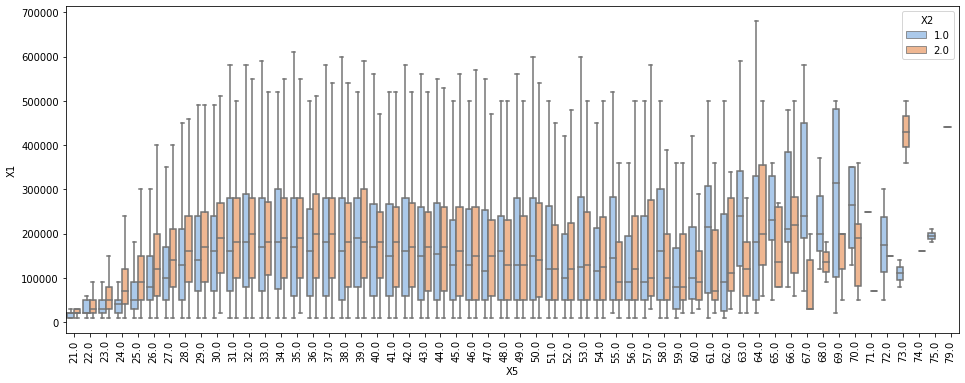

In [16]:
boxplot_variation('X5','X1', 'X2',16)

Los valores medios, Q3 y Q4 aumentan tanto para hombres como para mujeres con la edad hasta alrededor de los 34 años y luego oscilan y llegan a un máximo de Q4 para los hombres a los 65 años.

Los valores medios son generalmente menores para los hombres que para las mujeres, con pocas excepciones, por ejemplo, a los 39, 45, 54 años, hasta aproximadamente los 60 años, donde los valores medios para los hombres son generalmente mayores que para las mujeres.

In [17]:
x_features_num = ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

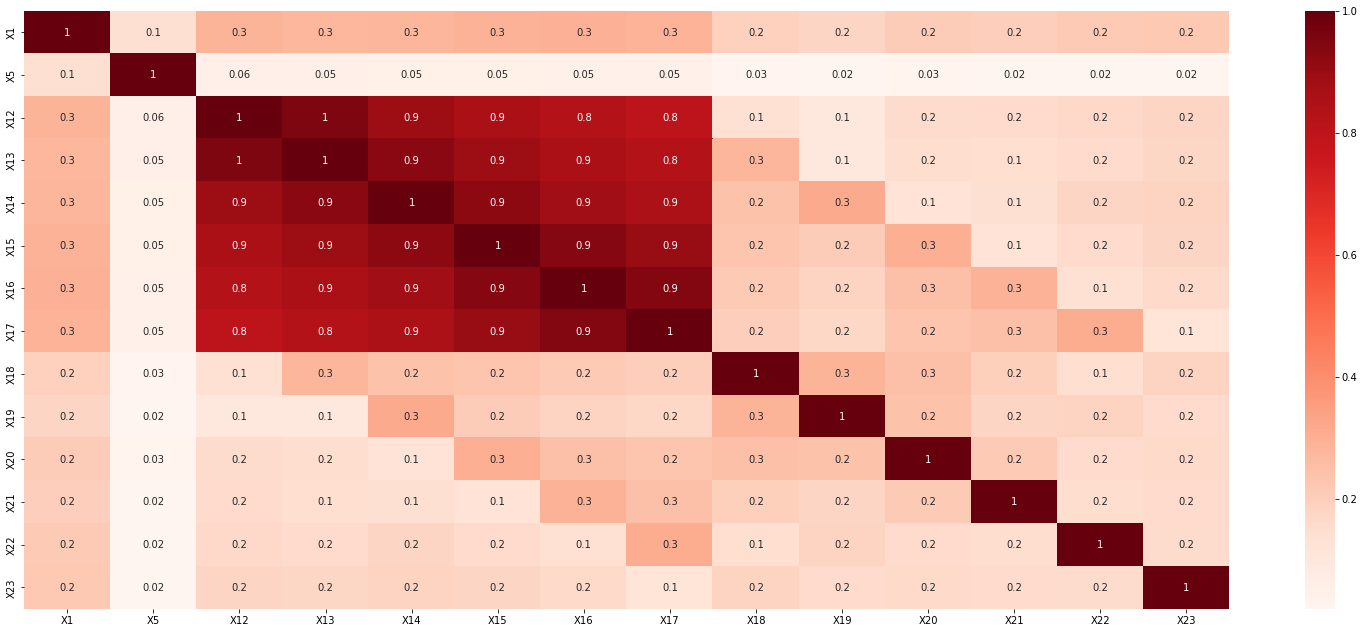

In [18]:
corr = x_features[x_features_num].corr()
plt.figure(figsize=(27, 11))
sns.heatmap(corr, annot=True,cmap='Reds', fmt='.1g')

Como observamos hay una alta correlación entre X12-X17: Importe del estado de cuenta (dólar NT).

Convierta 6 propiedades de estos en 2 componentes y luego verifique la volatilidad de los componentes individuales.

Para proceder con PCA vamos a arreglar la distribucion y escalar algunas variables a continuación.

In [21]:
scaler = MinMaxScaler()

x_features['X1'] = scaler.fit_transform(x_features['X1'].values.reshape(-1, 1))
x_features['X5'] = scaler.fit_transform(x_features['X5'].values.reshape(-1, 1))
x_features['X12'] = scaler.fit_transform(x_features['X12'].values.reshape(-1, 1))
x_features['X13'] = scaler.fit_transform(x_features['X13'].values.reshape(-1, 1))
x_features['X14'] = scaler.fit_transform(x_features['X14'].values.reshape(-1, 1))
x_features['X15'] = scaler.fit_transform(x_features['X15'].values.reshape(-1, 1))
x_features['X16'] = scaler.fit_transform(x_features['X16'].values.reshape(-1, 1))
x_features['X17'] = scaler.fit_transform(x_features['X17'].values.reshape(-1, 1))
x_features['X18'] = scaler.fit_transform(x_features['X18'].values.reshape(-1, 1))
x_features['X19'] = scaler.fit_transform(x_features['X19'].values.reshape(-1, 1))
x_features['X20'] = scaler.fit_transform(x_features['X20'].values.reshape(-1, 1))
x_features['X21'] = scaler.fit_transform(x_features['X21'].values.reshape(-1, 1))
x_features['X22'] = scaler.fit_transform(x_features['X22'].values.reshape(-1, 1))
x_features['X23'] = scaler.fit_transform(x_features['X23'].values.reshape(-1, 1))

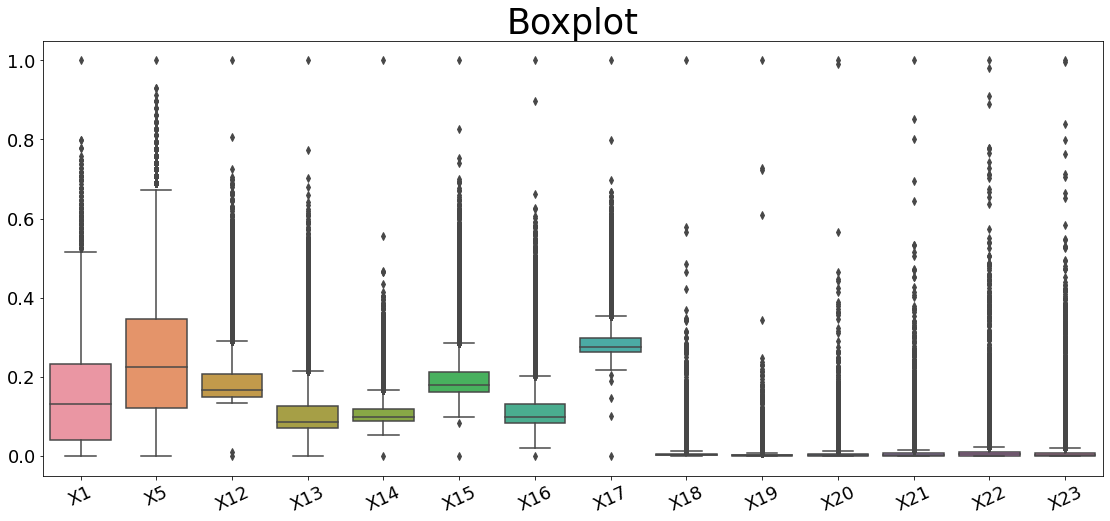

In [22]:
# BOXPLOT
cols = ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

fig=plt.figure(1, figsize=(19,8))
ax=fig.add_subplot(111)
sns.boxplot(data=x_features[cols])
plt.xticks(np.arange(0,14), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)
plt.title('Boxplot', fontsize= 35)

plt.savefig('Fig - Boxplot')

In [23]:
resumen = {
    "Varianzas": x_features[x_features_num].var()[0:14],
    "Valor Min": x_features[x_features_num].min()[0:14],
    "Valor Max": x_features[x_features_num].max()[0:14]
}

pd.DataFrame(resumen, index = x_features_num).transpose()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Varianzas,0.017174,0.025239,0.00425,0.004567,0.001451,0.003676,0.003638,0.002097,0.00036,0.000187,0.000387,0.000637,0.001284,0.001132
Valor Min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Valor Max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
#Calculamos la varianza total
t = x_features.var().sum()

#Calculamos la varianza en cada columna
var_x1 = x_features.X1.var()
var_x5 = x_features.X5.var()
var_x12 = x_features.X12.var()
var_x13 = x_features.X13.var()
var_x14 = x_features.X14.var()
var_x15 = x_features.X15.var()
var_x16 = x_features.X16.var()
var_x17 = x_features.X17.var()
var_x18 = x_features.X18.var()
var_x19 = x_features.X19.var()
var_x20 = x_features.X20.var()
var_x21 = x_features.X21.var()
var_x22 = x_features.X22.var()
var_x23 = x_features.X23.var()

#Mostramos los resultados en porcentajes
print('Varianza Total \t\t:',t.round(2) )
print('Varianza X1 \t\t:', ((var_x1/t)*100).round(2),'%' )
print('Varianza X5 \t\t:', ((var_x5/t)*100).round(2),'%' )
print('Varianza X12 \t\t:', ((var_x12/t)*100).round(2),'%' )
print('Varianza X13 \t\t:', ((var_x13/t)*100).round(2),'%' )
print('Varianza X14 \t\t:', ((var_x14/t)*100).round(2),'%' )
print('Varianza X15 \t\t:', ((var_x15/t)*100).round(2),'%' )
print('Varianza X16 \t\t:', ((var_x16/t)*100).round(2),'%' )
print('Varianza X17 \t\t:', ((var_x17/t)*100).round(2),'%' )
print('Varianza X18 \t\t:', ((var_x18/t)*100).round(2),'%' )
print('Varianza X19 \t\t:', ((var_x19/t)*100).round(2),'%' )
print('Varianza X20 \t\t:', ((var_x20/t)*100).round(2),'%' )
print('Varianza X21 \t\t:', ((var_x21/t)*100).round(2),'%' )
print('Varianza X22 \t\t:', ((var_x22/t)*100).round(2),'%' )
print('Varianza X23 \t\t:', ((var_x23/t)*100).round(2),'%' )

Varianza Total 		: 11.91
Varianza X1 		: 0.14 %
Varianza X5 		: 0.21 %
Varianza X12 		: 0.04 %
Varianza X13 		: 0.04 %
Varianza X14 		: 0.01 %
Varianza X15 		: 0.03 %
Varianza X16 		: 0.03 %
Varianza X17 		: 0.02 %
Varianza X18 		: 0.0 %
Varianza X19 		: 0.0 %
Varianza X20 		: 0.0 %
Varianza X21 		: 0.01 %
Varianza X22 		: 0.01 %
Varianza X23 		: 0.01 %


In [33]:
from sklearn.decomposition import PCA

pcs = PCA()

pcs_t = pcs.fit_transform(x_features[x_features_num])

pcs_t[:5]

array([[-2.62188336e-01, -2.66043778e-02,  2.83146373e-02,
        -1.05132422e-03,  7.51209387e-04, -3.05952325e-04,
        -1.05215274e-04, -6.32460149e-04,  6.96798290e-04,
        -3.51917933e-05,  4.01166784e-04,  4.00554416e-04,
         3.45054427e-04,  6.16867637e-04],
       [-1.88391545e-01,  6.77139992e-03, -4.11391700e-02,
        -5.52144572e-03, -3.54992213e-03,  2.12681964e-03,
        -2.33270419e-03, -3.17866955e-03, -2.00853044e-04,
        -1.35593370e-04, -2.96008355e-04,  7.43595845e-04,
        -2.78087729e-04, -9.08703054e-05],
       [-7.68808357e-02, -6.45053669e-02,  1.67421919e-02,
        -1.53734385e-03,  4.29286961e-03,  3.34608764e-03,
        -1.95443496e-04, -6.52743613e-03,  3.28971253e-03,
        -4.52592190e-04,  4.96339231e-03, -5.16948957e-03,
        -1.22299834e-03, -4.17206209e-04],
       [-3.67205094e-02, -8.51878698e-02,  8.15047941e-02,
        -5.24584074e-03,  6.52989127e-03, -4.47510817e-03,
         2.22508420e-03,  4.25317200e-04, -2.

In [34]:
#Calculamos la varianza explicada y la varianza acumulada
pcsResumen_df = pd.DataFrame({
    '% varianza explicada': np.round(pcs.explained_variance_ratio_, 4)*100,
    '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_)*100
})

#Agregamos las etiquetas correctas a las filas
pcs_labels = [f'PC{i + 1}' for i in range(len(x_features[x_features_num].columns))]
pcsResumen_df.index = pcs_labels
pcsResumen_df

,% varianza explicada,% varianza acumulada
PC1,41.41,41.407923
PC2,31.95,73.358705
PC3,18.27,91.627959
PC4,2.05,93.678019
PC5,1.72,95.399950
PC6,1.55,96.945241
PC7,0.93,97.877114
PC8,0.67,98.544561
PC9,0.53,99.077666
PC10,0.37,99.446890


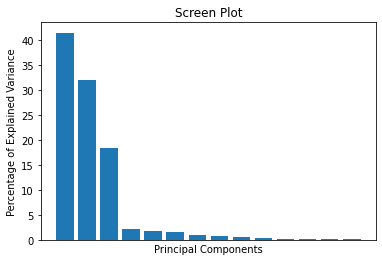

In [28]:
per_var = np.round(pcs.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x', which = 'both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Screen Plot')
plt.show()

El número mínimo de componentes principales después de aplicar PCA sería 3, debido a que la mayor cantidad se encuentra dentro de estas primeros componentes, completando un 91% de la varianza acumulada

Verificamos la varianza de los valores y los valores después de PCA para verificar la pérdida de datos.

In [41]:
pcs_df = pd.DataFrame(pcs_t, columns = pcs_labels)

print("Varianza total variables originales: ", x_features[x_features_num].var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  0.06607901599120342
Varianza total de los componentes:  0.06607901599120343


Calculamos la varianza y la varianza acumulada en porcentajes de los valores escalados utilizados en PCA

In [42]:
total_var = x_features[x_features_num].var().sum()

pd.DataFrame({
    "Porcentaje Varianza": (x_features[x_features_num].var() / total_var)*100,
    "Porcentaje Varianza Acumulado": (x_features[x_features_num].var().cumsum() / total_var)*100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,25.989370,25.989370
X5,38.195035,64.184405
X12,6.432048,70.616454
X13,6.911827,77.528281
X14,2.196253,79.724534
X15,5.563157,85.287692
X16,5.505059,90.792751
X17,3.172829,93.965579
X18,0.544430,94.510010
X19,0.283587,94.793596


In [43]:
componentes_df = pd.DataFrame(
    pcs.components_.round(4),
    columns = pcs_df.columns,
    index = x_features[x_features_num].columns
)
componentes_df.iloc[:,:3].idxmax()

PC1     X5
PC2     X1
PC3    X14
dtype: object

Para las 3 primeros componenetes los cuales mas explican la varianza, encontramos que las variables que las variables que más influyens son la X5, X1 y X14 respectivamente.